## Part 1.1 - Baseline
#### *Pol Roca Llaberia*

In this notebook we will define a baseline neural network model to classify the well-known MNIST dataset. This simple model consisting of basically one convolutional layer and one dense output layer will be the stub that we will attempt to improve on the following notebooks, in a situation where data is scarce.

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np 

In [4]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [5]:
N = 5000

In [6]:
X_train = X_train[:N]
y_train = y_train[:N]
X_test = X_test[:2500]
y_test = y_test[:2500]

# Make sure images have shape (28, 28, 1)
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

In [7]:
print(X_train.shape)
print(X_test.shape)
np.unique(y_test, return_counts=True)

(5000, 28, 28, 1)
(2500, 28, 28, 1)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([219, 287, 276, 254, 275, 221, 225, 257, 242, 244]))

In [8]:
def build_model():
    model = models.Sequential()
    model.add(layers.Conv2D(20, (5, 5), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(num_classes))
    return model

In [9]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 20)        520       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 20)        0         
_________________________________________________________________
flatten (Flatten)            (None, 2880)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                28810     
Total params: 29,330
Trainable params: 29,330
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(optimizer='SGD',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [11]:
history = model.fit(X_train, 
                    y_train, 
                    epochs=50, 
                    batch_size=32, 
                    validation_data=(X_test, y_test), 
                    verbose=1).history

Epoch 1/50
157/157 [==============================] - 33s 6ms/step - loss: 29.6485 - accuracy: 0.3165 - val_loss: 1.2226 - val_accuracy: 0.7532
Epoch 2/50
157/157 [==============================] - 0s 3ms/step - loss: 0.9289 - accuracy: 0.7476 - val_loss: 0.8765 - val_accuracy: 0.8060
Epoch 3/50
157/157 [==============================] - 0s 3ms/step - loss: 0.5973 - accuracy: 0.8286 - val_loss: 0.5285 - val_accuracy: 0.8608
Epoch 4/50
157/157 [==============================] - 0s 3ms/step - loss: 0.3473 - accuracy: 0.9032 - val_loss: 0.4682 - val_accuracy: 0.8784
Epoch 5/50
157/157 [==============================] - 1s 3ms/step - loss: 0.4679 - accuracy: 0.8684 - val_loss: 3.9198 - val_accuracy: 0.7372
Epoch 6/50
157/157 [==============================] - 0s 3ms/step - loss: 0.5016 - accuracy: 0.8885 - val_loss: 0.6460 - val_accuracy: 0.8588
Epoch 7/50
157/157 [==============================] - 0s 3ms/step - loss: 0.2140 - accuracy: 0.9407 - val_loss: 0.5488 - val_accuracy: 0.8476
Epoc

In [12]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

79/79 - 0s - loss: 1.5743 - accuracy: 0.8956


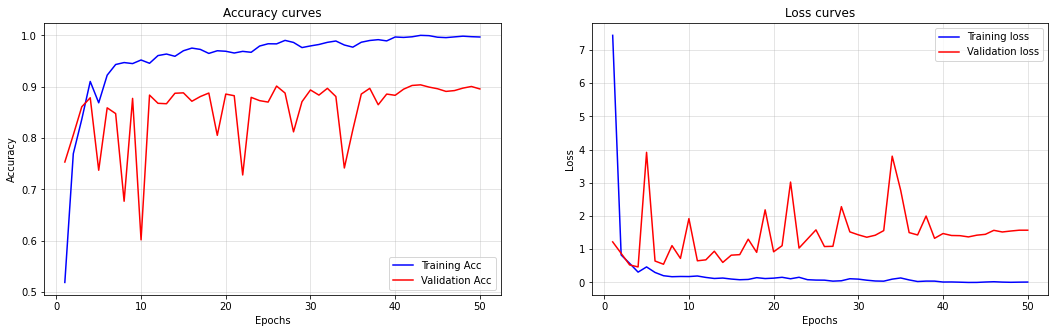

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

# plot accuracy
acc = history['accuracy']
val_acc = history['val_accuracy']
epochs = range(1, len(acc)+1)

ax = axes[0]
ax.plot(epochs, acc, 'b', label='Training Acc')
ax.plot(epochs, val_acc, 'r', label='Validation Acc')
ax.set_title('Accuracy curves')
ax.set_xlabel('Epochs')
ax.set_ylabel('Accuracy')
ax.grid(alpha=0.4)
ax.legend()

# plot validation loss
loss = history['loss']
val_loss = history['val_loss']

ax = axes[1]
ax.plot(epochs, loss, 'b', label='Training loss')
ax.plot(epochs, val_loss, 'r', label='Validation loss')
ax.set_title('Loss curves')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.grid(alpha=0.4)
ax.legend()

plt.show()

### Observations

The model is able to achieve a decent accuracy of 0.8956. However, it could be higher. The reason is that we are obtaining results from a slice of 7500 images, while the entire dataset contains 60k images. That means that the test set could contain an other distribution of cases that are too different from what the model has learnt because the samples are quite small compared to the total size from which they are drawn. 

Additionaly, the fact that we are splitting data into 66% for training and 33% for testing and not 80% for training and 20% for testing, for example, increases the chances that the difference in the distribution is reflected in the resuls, since the test set is larger than normal in proportion. By looking at the plots, we can confirm that the training set is not representative enough because at every point there is a gap between the validation and training losses, even when the model classifies correctly the training set. Furthemore, the validation loss has a tendency to increase which means there could be overfitting, although it is less noticeable.

----
